# Gaussian Process

In [ ]:
links:
- https://d2l.ai/chapter_gaussian-processes/gp-intro.html
- https://en.wikipedia.org/wiki/Stochastic_process

- stochastic process: sequence of random variables, usually over time
- example: growth of bacterial population
- Gaussian Process: stochastic process, were any collection of random variables has multivariate normal distribution

A time continuous stochastic process $\{ X_t : t \in T \}$ is Gaussian, iff for every finite set of indices $t_1, ..., t_k \in T$

$$
    X_{t_1, ..., t_k} = (X_{t_1}, ..., X_{t_k})
$$

is a multivariate Gaussian random variable.

- covariance matrix is given by evaluating the kernel on all input pairs
- 

- machine learning models: learn function by optimizing free parameters
- usually, parameters are hard to interprete
- Gaussian Processes: allows directly reasoning about distribution of functions
- high-level properties of solutions are controlled by covariance function (kernel)
- usually only a few interpretable hyperparameters
- for example, RBF kernel has only 2 hyperparameters, which correspond to amplitude and "wiggliness" of the function
- have sampled data points for a regression task
- start by defining prior distribution over reasonable functions 
- can infer posterior distribution: which functions actually fit the observed data?
- epistemic uncertainty: reducible uncertainty associated with a lack of information
- properties of Gaussian Process is strongly controlled by covariance function, aka kernel
- 

# Gaussian Process Priors

https://d2l.ai/chapter_gaussian-processes/gp-priors.html

In [3]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

Any Gaussian Process can be expressed in the form

$$
    f(x) = w^T \phi(x)
$$

where $w$ is a weight drawn from a normal distribution and $\phi$ is a vector of basis functions, e.g. $\phi(x) = (1, x, x^2, ..., x^d)^T$

- consider function $f(x) = w_0 + w_1 x$, where $w_0, w_1 \sim \mathcal{N}(0,1)$
- $f(x)$ is sum of two Gaussian random variables
- Gaussians are closed under addition!
- therefore, $f(x)$ is also Gaussian RV $\sim \mathcal{N}(0, 1 + x^2)$ and collection of function values has multivariate Gaussian distribution
- f(x) is Gaussian Process, that represents distribution over functions induced by random variables $w_0, w_1$

Text(0, 0.5, 'f(x)')

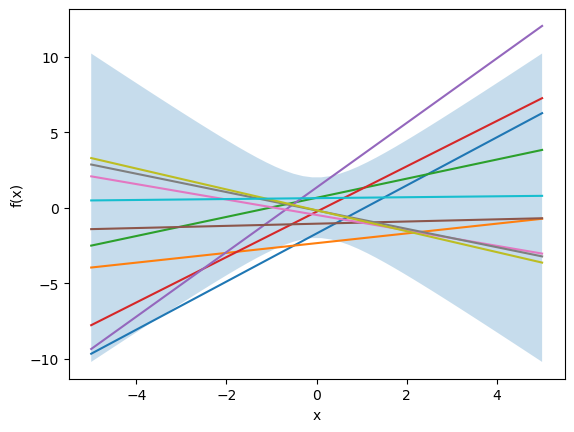

In [12]:
def lin_func(x, n_sample):
    preds = np.zeros((n_sample, x.shape[0]))
    for ii in range(n_sample):
        w = np.random.normal(0, 1, 2)
        y = w[0] + w[1] * x
        preds[ii, :] = y
    return preds

x_points = np.linspace(-5, 5, 50)
outs = lin_func(x_points, 10)

# can show that the variance of f(x) is 1 + x^2
lw_bd = -2 * np.sqrt((1 + x_points ** 2))
up_bd = 2 * np.sqrt((1 + x_points ** 2))

plt.fill_between(x_points, lw_bd, up_bd, alpha=0.25)
plt.plot(x_points, outs.T)
plt.xlabel("x")
plt.ylabel("f(x)")

- reasoning about parameters is tedious
- Gaussian Processes are defined entirely by first two moments: mean and covariance matrix

$$
    m(x) = E[f(x)] = E[w_0 + w_1 x] = E[w_0] + E[w_1] x = 0
$$

$$
    k(x, x') = Cov(f(x), f(x')) = E[f(x) f(x')] - E[f(x)] E[f(x')] = E[w_0^2 + w_0 w_1 x + w_0 w_1 x' + w_1^2 x x']
$$

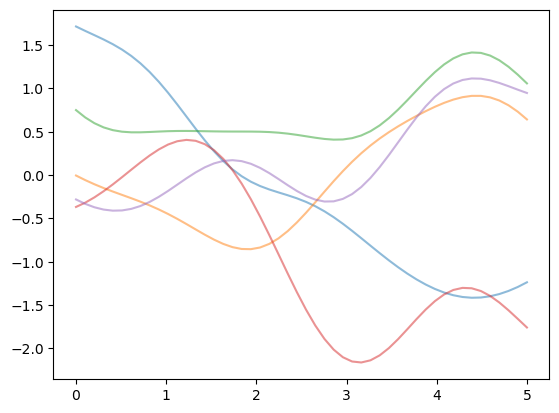

In [16]:
def rbfkernel(x1, x2, ls=4):
    dist = distance_matrix(np.expand_dims(x1, 1), np.expand_dims(x2, 1))
    return np.exp( -1 / (ls * 2) * (dist ** 2))

x_points = np.linspace(0, 5, 50)
meanvec = np.zeros(len(x_points))

# compute covariance matrix based on observed points
covmat = rbfkernel(x_points, x_points, 1)

# sample new points from the multivariate gaussian
prior_samples = np.random.multivariate_normal(meanvec, covmat, size=5)
plt.plot(x_points, prior_samples.T, alpha=0.5);

In [17]:
np.expand_dims(x_points, 1)

array([[0.        ],
       [0.10204082],
       [0.20408163],
       [0.30612245],
       [0.40816327],
       [0.51020408],
       [0.6122449 ],
       [0.71428571],
       [0.81632653],
       [0.91836735],
       [1.02040816],
       [1.12244898],
       [1.2244898 ],
       [1.32653061],
       [1.42857143],
       [1.53061224],
       [1.63265306],
       [1.73469388],
       [1.83673469],
       [1.93877551],
       [2.04081633],
       [2.14285714],
       [2.24489796],
       [2.34693878],
       [2.44897959],
       [2.55102041],
       [2.65306122],
       [2.75510204],
       [2.85714286],
       [2.95918367],
       [3.06122449],
       [3.16326531],
       [3.26530612],
       [3.36734694],
       [3.46938776],
       [3.57142857],
       [3.67346939],
       [3.7755102 ],
       [3.87755102],
       [3.97959184],
       [4.08163265],
       [4.18367347],
       [4.28571429],
       [4.3877551 ],
       [4.48979592],
       [4.59183673],
       [4.69387755],
       [4.795